## Hyperparameter optimization trial code ##

In [3]:
# Using Iris dataset to test #
import automation_script
import pandas as pd
import numpy as np
from os import path

dataset_name = "UCI Iris"
dataset_info = automation_script.get_url(dataset_name)

In [4]:
# Import iris dataset #
url = "../data/iris.csv" if path.exists("../data/iris.csv") else dataset_info['url']
data = pd.read_csv(url , delimiter=",", header=None, index_col=False)
class_name,index = np.unique(data.iloc[:,-1],return_inverse=True)
data.iloc[:,-1] = index
data = data.loc[data[4] != 2]
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
type(Y)

pandas.core.series.Series

In [30]:
# data.filter(items=[2,3])
# data.lookup([data[2].argmax()],[4])
data_1 = data.iloc[data[2].idxmax()]
# data[2].max()
# df.loc[df['A'].idxmax()]
# data
data_1

0    6.0
1    2.7
2    5.1
3    1.6
4    1.0
Name: 83, dtype: float64

In [31]:
data_1.iloc[3]

1.6

In [48]:
import pandas as pd
url = './talos_readings_1.csv'
report = pd.read_csv(url, delimiter=",", header=0, index_col=False)
performance_metric = 'val_loss'
report = report.filter(items=[performance_metric, 'optimizer', 'losses'])
# report = report.iloc[report[performance_metric].idxmax()]
# loss = report['losses']
# optimizer = report['optimizer']
# loss.split(" ")[1]

In [49]:
report.iloc[report[performance_metric].idxmax()]

val_loss                                               29835.2
optimizer                                                nadam
losses       <function mean_squared_error at 0x000001DB59CF...
Name: 1, dtype: object

In [36]:
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [3]:
scikit_score, scikit_params, predictions = automation_script.get_scikit_params(X,Y)

1.0


In [ ]:
predictions = pd.Series(predictions)
print(predictions)


In [ ]:
print(Y)

In [4]:
config = {
    'epoch': 200,
    'batch_size': 10,
    'verbose': 0,
    'model_info': {
        'loss':'binary_crossentropy',
        'optimizer':'adam',
        'metrics':['accuracy']
    }
}

keras_score,keras_params = automation_script.get_keras_params(X,Y,predictions,dataset_info,config)

Using TensorFlow backend.


60/60 [==============================] - 0s 270us/step

acc: 93.33%

acc: 93.33%


---

### Talos trial ###

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, Nadam
from keras.losses import categorical_crossentropy, logcosh
from keras.activations import sigmoid
import talos as ta
from sklearn.model_selection import train_test_split


x, y = ta.datasets.iris()

# then define the parameter boundaries

p = {'lr': [2, 10, 30],
     'first_neuron': [3],
     'batch_size': [20],
     'epochs': [100],
     'weight_regulizer': [None],
     'emb_output_dims': [None],
     'optimizer': ['adam'],
     'losses': [categorical_crossentropy],
     'activation': [sigmoid]
    }


# then define your Keras model
def iris_model(x_train, y_train, x_val, y_val, params):

    model = Sequential()
    model.add(Dense(params['first_neuron'],
                    input_dim=x_train.shape[1],
                    activation=params['activation']))

    model.compile(optimizer=params['optimizer'],
                  loss=params['losses'],
                  metrics=['acc'])

    out = model.fit(x_train, y_train,
                    batch_size=params['batch_size'],
                    epochs=params['epochs'],
                    verbose=0,
                    validation_data=[x_val, y_val])

    return out, model


# and run the scan
h = ta.Scan(x, y,
            params=p,
            dataset_name='first_test',
            experiment_no='a',
            model=iris_model,
            grid_downsample=0.5)

100%|██████████| 1/1 [00:12<00:00, 12.05s/it]


Scan Finished!


In [2]:
import json
p = json.load(open('../imly/architectures/talos/params.json'))
p_dict = dict(p['params'])
p_dict

{'LinearRegression': {'config': {'lr': [2, 10, 30],
   'first_neuron': [1],
   'batch_size': [10],
   'epochs': [10],
   'weight_regulizer': [None],
   'emb_output_dims': [None],
   'optimizer': ['nadam'],
   'losses': ['mse'],
   'activation': ['linear']},
  'performance_metric': 'val_loss'}}

In [18]:
from keras import losses as keras_losses
name = 'mse'
loss = keras_losses.mean_squared_error
loss

<function keras.losses.mean_squared_error(y_true, y_pred)>

In [17]:
module = __import__('keras.losses', fromlist=[name])
getattr(module, name)

<function keras.losses.mean_squared_error(y_true, y_pred)>

In [24]:
params = {}
params['losses'] = ['mse','hinge']
losses = params['losses']
params['losses'] = []
for loss_name in losses:
    module = __import__('keras.losses', fromlist=[loss_name])
    params['losses'].append(getattr(module, name))

In [25]:
params

{'losses': [<function keras.losses.mean_squared_error(y_true, y_pred)>,
  <function keras.losses.mean_squared_error(y_true, y_pred)>]}

In [3]:
p_normal = p['params']['f1']
p_normal

{'lr': [2, 10, 30],
 'first_neuron': [1],
 'batch_size': [10],
 'epochs': [10],
 'weight_regulizer': ['None'],
 'emb_output_dims': ['None'],
 'optimizer': ['nadam'],
 'losses': ['mse'],
 'activation': ['linear']}

In [3]:
h.details

random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
grid_downsample                     0.5
reduction_threshold                 0.2
reduction_metric                val_acc
reduce_loss                       False
experiment_name            first_test_a
complete_time            12/31/18/20:52
x_shape                        (150, 4)
y_shape                        (150, 3)
dtype: object

In [4]:
h.data

,round_epochs,val_loss,val_acc,loss,acc,lr,first_neuron,batch_size,epochs,weight_regulizer,emb_output_dims,optimizer,losses,activation
0,100,0.7258705761697557,0.8888888888888888,0.7120646437009176,0.7904761859348842,10,3,20,100,None,None,adam,<function categorical_crossentropy at 0x000001...,<function sigmoid at 0x000001DAD5A67840>


In [7]:
report = h.data
report = report.filter(items=['val_loss', 'optimizer', 'losses'])
# report = report.iloc[report[performance_metric].idxmax()]
# loss = report['losses']
# loss = loss.split(" ")[1]
# optimizer = report['optimizer']

In [18]:
report.loc[:,'optimizer'][0]

'<function categorical_crossentropy at 0x000001DAD5A387B8>'

In [7]:
from talos import Reporting
r = Reporting('first_test_a.csv')

In [8]:
r.data

,round_epochs,val_loss,val_acc,loss,acc,lr,first_neuron,batch_size,epochs,weight_regulizer,emb_output_dims,optimizer,losses,activation
0,100,0.920621,0.577778,0.862995,0.704762,7,3,20,100,None,None,adam,<function categorical_crossentropy at 0x000002...,<function sigmoid at 0x0000021EB8E7E8C8>
1,100,0.633556,0.911111,0.637392,0.857143,9,3,20,100,None,None,adam,<function categorical_crossentropy at 0x000002...,<function sigmoid at 0x0000021EB8E7E8C8>
2,100,0.982563,0.400000,1.019067,0.333333,5,3,20,100,None,None,adam,<function categorical_crossentropy at 0x000002...,<function sigmoid at 0x0000021EB8E7E8C8>
3,100,0.761032,0.577778,0.741682,0.619048,6,3,20,100,None,None,adam,<function categorical_crossentropy at 0x000002...,<function sigmoid at 0x0000021EB8E7E8C8>


In [12]:
r.high('val_acc')

0.9777777989705404

In [13]:
# Number of rounds it took to find the best model #
r.rounds2high()

18

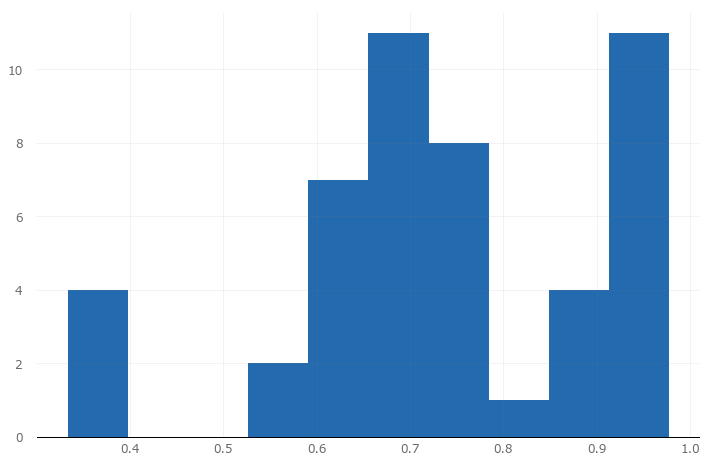

In [14]:
# x-axis is val_acc. What is y-axis? #
r.plot_hist()

In [9]:
r.best_model(metric='val_loss')

AttributeError: 'Reporting' object has no attribute 'best_model'

In [10]:
from talos import Predict
p = Predict(h)
p.predict_classes(x)

array([0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 2, 2, 0,
       2, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1,
       2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 1, 2, 0, 1, 2, 1, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 2, 2,
       2, 1, 0, 0, 1, 2, 0, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2], dtype=int64)

In [13]:
r.best_params()

array([[20, 'adam',
        '<function categorical_crossentropy at 0x0000021EB8E4F840>', 9,
        '<function sigmoid at 0x0000021EB8E7E8C8>', 3, 100, 'None',
        'None', 0],
       [20, 'adam',
        '<function categorical_crossentropy at 0x0000021EB8E4F840>', 6,
        '<function sigmoid at 0x0000021EB8E7E8C8>', 3, 100, 'None',
        'None', 1],
       [20, 'adam',
        '<function categorical_crossentropy at 0x0000021EB8E4F840>', 7,
        '<function sigmoid at 0x0000021EB8E7E8C8>', 3, 100, 'None',
        'None', 2],
       [20, 'adam',
        '<function categorical_crossentropy at 0x0000021EB8E4F840>', 5,
        '<function sigmoid at 0x0000021EB8E7E8C8>', 3, 100, 'None',
        'None', 3]], dtype=object)

In [2]:
from talos.utils.best_model import best_model

best_model(h,metric='val_loss',asc=False)

2

In [29]:
from talos import Evaluate

# create the evaluate object
e = Evaluate(h)
e.evaluate(x, y, average='macro')

14.74% (+/- 4.88%)


---

#### Notes ####

1. Why is there a mismatch in y_shape of our model and   
Talos model?
2. How to validate or cross check the performance of  
Talos optimization?
3. The y_shape is 3(and hence expected to have 3 classes).  
But the y data contains only 2 classes. Why?  
3. **Report method is no longer available**
 - Any alternates available?
4. Why does p.predict(x) return 3 values instead of one value? What are these 3 values?
5. What does evaluate do? The 'average' param.